In [1]:
import uproot4
import awkward1 as ak
from yahist import Hist1D
import matplotlib.pyplot as plt
import numpy as np

import mplhep as hep
plt.style.use([hep.style.CMS])

#file = uproot4.open("root://cmsxrootd.fnal.gov//store/mc/RunIISummer19UL18NanoAOD/GluGluHToGG_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v11_L1v1-v1/110000/E1DFB6D5-7AD6-8241-A92F-4F006D1DA3E3.root")
file = uproot4.open("root://cmsxrootd.fnal.gov//store/mc/RunIIFall17NanoAODv7/GluGluHToGG_M125_13TeV_amcatnloFXFX_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano02Apr2020_EXT_102X_mc2017_realistic_v8-v1/230000/A901A08D-A1B5-094B-86D3-E56402721BE0.root")
#file = uproot4.open("root://cmsxrootd.fnal.gov//store/mc/RunIIFall17NanoAODv7/GluGluHToGG_M125_13TeV_amcatnloFXFX_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano02Apr2020_EXT_102X_mc2017_realistic_v8-v1/20000/893667C9-A7A9-DD43-B542-11C76561029E.root")
file

<ReadOnlyDirectory '/' at 0x7fbcf82f6dc0>

In [2]:
tree = file['Events']
tree.keys()
#tree.show()
gen_keys = tree.keys(filter_name="GenPart_*")
genJet_keys = tree.keys(filter_name="GenJet_*")
gen_keys, genJet_keys

(['GenPart_eta',
  'GenPart_mass',
  'GenPart_phi',
  'GenPart_pt',
  'GenPart_genPartIdxMother',
  'GenPart_pdgId',
  'GenPart_status',
  'GenPart_statusFlags'],
 ['GenJet_eta',
  'GenJet_mass',
  'GenJet_phi',
  'GenJet_pt',
  'GenJet_partonFlavour',
  'GenJet_hadronFlavour'])

In [3]:
genPart = tree.arrays(gen_keys + genJet_keys + ["genWeight"], library="ak", how="zip") 
#genPart = tree.arrays(gen_keys + ["genWeight"], library="ak", how="zip") 
#genPart = tree.arrays(["genWeight"], library="ak", how="zip") 
genPart

<Array [{genWeight: -193, GenPart: [, ... ] type='930376 * {"genWeight": float32...'>

In [4]:
mask_hardProcess = ( (genPart.GenPart.status > 20) & (genPart.GenPart.status < 25) )
mask_hardProcessOut = ( (genPart.GenPart.status > 22) & (genPart.GenPart.status < 25) )
mask_hardProcessIn = ( (genPart.GenPart.status > 20) & (genPart.GenPart.status < 23) )

#mask_ggHID = ( (genPart.GenPart.pdgId == 25) | (genPart.GenPart.pdgId == 21) )
#mask_cHID = ( (genPart.GenPart.pdgId == 25)  | (abs(genPart.GenPart.pdgId) == 4))
mask_g = (genPart.GenPart.pdgId == 21)
mask_c = (abs(genPart.GenPart.pdgId) == 4)
mask_a = (genPart.GenPart.pdgId == 22)

cnt_ng_hard = ak.num( genPart.GenPart[mask_hardProcess & mask_g] ) 
cnt_nc_hard = ak.num( genPart.GenPart[mask_hardProcess & mask_c] )
cnt_na_hard = ak.num( genPart.GenPart[mask_hardProcess & mask_a] )

cnt_nHard = ak.num( genPart.GenPart[mask_hardProcess])
cnt_nc_in = ak.num( genPart.GenPart[mask_c & mask_hardProcessIn] )
cnt_nc_out = ak.num( genPart.GenPart[mask_c & mask_hardProcessOut] )

##mask_ggH_1g
unique_elements1, counts_elements1 = np.unique(ak.to_numpy(cnt_ng_hard), return_counts=True)
unique_elements2, counts_elements2 = np.unique(ak.to_numpy(cnt_nc_hard), return_counts=True)

print("number of gluons at hard process")
print(np.asarray((unique_elements1, counts_elements1)))
print()
print("number of charms at hard process")
print(np.asarray((unique_elements2, counts_elements2)))

number of gluons at hard process
[[     0      1      2      3      4      5]
 [  7202  75697 391875 239784 166635  49183]]

number of charms at hard process
[[     0      2      4]
 [913388  16934     54]]


## Start with events with 2 charms at hard process (16934 events)

- 1 incoming charm + 1 outgoing charm + 1/2/3 extra gluons
- 1 incoming charm + 1 outgoing charm + 0 gluons
- 2 outgoing charms + 0/>0 light quarks/gluons
- 2 incoming charms 

In [5]:
mask_1cin_1cout_1g_4had = (cnt_nc_in == 1) & (cnt_nc_out == 1) & (cnt_ng_hard == 1) & (cnt_nHard == 4)
coll_1cin_1cout_1g_4had = genPart.GenPart[mask_1cin_1cout_1g_4had]

mask_1cin_1cout_1g_0a_6had = (cnt_nc_in == 1) & (cnt_nc_out == 1) & (cnt_ng_hard == 1) & (cnt_na_hard == 0) & (cnt_nHard == 6)
coll_1cin_1cout_1g_0a_6had = genPart.GenPart[mask_1cin_1cout_1g_0a_6had]

mask_1cin_1cout_1g_2a_6had = (cnt_nc_in == 1) & (cnt_nc_out == 1) & (cnt_ng_hard == 1) & (cnt_na_hard == 2) & (cnt_nHard == 6)
coll_1cin_1cout_1g_2a_6had = genPart.GenPart[mask_1cin_1cout_1g_2a_6had]

mask_1cin_1cout_2g_5had = (cnt_nc_in == 1) & (cnt_nc_out == 1) & (cnt_ng_hard == 2) & (cnt_nHard == 5)
coll_1cin_1cout_2g_5had = genPart.GenPart[mask_1cin_1cout_2g_5had]

mask_1cin_1cout_2g_2a_7had = (cnt_nc_in == 1) & (cnt_nc_out == 1) & (cnt_ng_hard == 2) & (cnt_na_hard == 2) & (cnt_nHard == 7)
coll_1cin_1cout_2g_2a_7had = genPart.GenPart[mask_1cin_1cout_2g_2a_7had]

mask_1cin_1cout_3g_6had = (cnt_nc_in == 1) & (cnt_nc_out == 1) & (cnt_ng_hard == 3) & (cnt_nHard == 6)
coll_1cin_1cout_3g_6had = genPart.GenPart[mask_1cin_1cout_3g_6had]

mask_1cin_1cout_3g_2a_8had = (cnt_nc_in == 1) & (cnt_nc_out == 1) & (cnt_ng_hard == 3) & (cnt_na_hard == 2) & (cnt_nHard == 8)
coll_1cin_1cout_3g_2a_8had = genPart.GenPart[mask_1cin_1cout_3g_2a_8had]

mask_1cin_1cout_0g = (cnt_nc_in == 1) & (cnt_nc_out == 1) & (cnt_ng_hard == 0)# & (cnt_nHard == 4)
coll_1cin_1cout_0g = genPart.GenPart[mask_1cin_1cout_0g]

mask_0cin_2cout = ((cnt_nc_in == 0) & (cnt_nc_out == 2)) #& (cnt_ng_hard == 0)# & (cnt_nHard == 4)
coll_0cin_2cout = genPart.GenPart[mask_0cin_2cout]

mask_2cin_0cout = ((cnt_nc_in == 2) & (cnt_nc_out == 0)) #& (cnt_ng_hard == 0)# & (cnt_nHard == 4)
coll_2cin_0cout = genPart.GenPart[mask_2cin_0cout]

mask_2cin_2cout = ((cnt_nc_in == 2) & (cnt_nc_out == 0)) #& (cnt_ng_hard == 0)# & (cnt_nHard == 4)
coll_2cin_2cout = genPart.GenPart[mask_2cin_2cout]

mask_1cin_3cout = ((cnt_nc_in == 1) & (cnt_nc_out == 3)) #& (cnt_ng_hard == 0)# & (cnt_nHard == 4)
coll_1cin_3cout = genPart.GenPart[mask_1cin_3cout]

print ("1cin_1cout_1g_4had: ", len(coll_1cin_1cout_1g_4had))
print ("1cin_1cout_1g_2a_6had: ", len(coll_1cin_1cout_1g_2a_6had))
print ("1cin_1cout_1g_0a_6had: ", len(coll_1cin_1cout_1g_0a_6had))

print ("1cin_1cout_2g_5had: ", len(coll_1cin_1cout_2g_5had))
print ("1cin_1cout_2g_2a_7had: ", len(coll_1cin_1cout_2g_2a_7had))

print ("1cin_1cout_3g_6had: ", len(coll_1cin_1cout_3g_6had))
print ("1cin_1cout_3g_2a_8had: ", len(coll_1cin_1cout_3g_2a_8had))

print ("1cin_1cout_0g: ", len(coll_1cin_1cout_0g))

print ("0cin_2cout: ", len(coll_0cin_2cout))
print ("2cin_0cout: ", len(coll_2cin_0cout))
print ("2cin_2cout: ", len(coll_2cin_2cout))
print ("1cin_3cout: ", len(coll_1cin_3cout))

1cin_1cout_1g_4had:  5122
1cin_1cout_1g_2a_6had:  293
1cin_1cout_1g_0a_6had:  508
1cin_1cout_2g_5had:  5128
1cin_1cout_2g_2a_7had:  309
1cin_1cout_3g_6had:  1476
1cin_1cout_3g_2a_8had:  86
1cin_1cout_0g:  968
0cin_2cout:  2996
2cin_0cout:  17
2cin_2cout:  17
1cin_3cout:  13


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


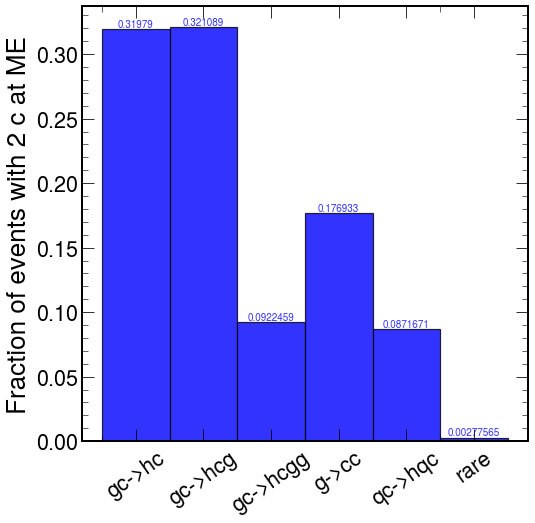

In [133]:
cnt_cH_prl = len(coll_1cin_1cout_1g_4had) + len(coll_1cin_1cout_1g_2a_6had)
cnt_cH_prl_1mg = len(coll_1cin_1cout_2g_5had) + len(coll_1cin_1cout_2g_2a_7had)
cnt_cH_prl_2mg = len(coll_1cin_1cout_3g_6had) + len(coll_1cin_1cout_3g_2a_8had)
cnt_gsplit = len(coll_0cin_2cout)
cnt_1cout_0g_withOtherQ = len(coll_1cin_1cout_1g_0a_6had) + len(coll_1cin_1cout_0g)
cnt_rare_moreC = len(coll_2cin_0cout) + len(coll_2cin_2cout) + len(coll_1cin_3cout)

cnts = [cnt_cH_prl,cnt_cH_prl_1mg,cnt_cH_prl_2mg,cnt_gsplit,cnt_1cout_0g_withOtherQ,cnt_rare_moreC]
bin_cnts = np.linspace(0,len(cnts),len(cnts)+1)
h_cnts = Hist1D(np.zeros(len(cnts)), bins=bin_cnts)
for i in range(len(cnts)):
    h_cnts._counts[i] = cnts[i]/np.sum(np.array(cnts))
    
fig,ax = plt.subplots(1,figsize=(8,8))
#h_cnts.plot(ax=ax,alpha=0.8,color="blue",show_counts=True,edgecolor='black', linewidth=1.2)
h_cnts.plot(ax=ax,alpha=0.8,color="blue",histtype='bar',show_counts=True,edgecolor='black', linewidth=1.2)

# https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
ax.set_xticks(np.arange(0.5,6.5,1))
#ax.xaxis.set_visible(False)
labels = ["gc->hc", "gc->hcg", "gc->hcgg", "g->cc", "qc->hqc", "rare"]
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
            tick.set_rotation(35)
        
# https://matplotlib.org/3.1.0/gallery/ticks_and_spines/major_minor_demo.html
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.set_ylabel("Fraction of events with 2 c at ME")

plt.savefig("/home/users/hmei/public_html/scratch/evt_cat_me.png",bbox_inches='tight')
plt.savefig("/home/users/hmei/public_html/scratch/evt_cat_me.pdf",bbox_inches='tight')

## in events without c at ME, how many have g->cc in Pythia

- find a c quark or D meson with gluon as its mother
- D meson PDG ID: 411, 421, 10411, 10421, 413, 423, 10413, 10423, 20413, 20423, 415, 425, 431, 10431, 433, 10433, 20433, 435
- reference: https://pdg.lbl.gov/2006/reviews/pdf-files/montecarlo-web.pdf

In [89]:
D_pdgIDs = [411, 421, 10411, 10421, 413, 423, 10413, 10423, 20413, 20423, 415, 425, 431, 10431, 433, 10433, 20433, 435]

mask_0_hard_c = cnt_nc_hard == 0
genPart_0_hard_c = genPart[mask_0_hard_c]

mIdx = genPart_0_hard_c.GenPart.genPartIdxMother
mask_fromGluon = genPart_0_hard_c.GenPart.pdgId[mIdx] == 21
mask_cquark = abs(genPart_0_hard_c.GenPart.pdgId) == 4

mask_hardProcess_0hard = ( (genPart_0_hard_c.GenPart.status > 20) & (genPart_0_hard_c.GenPart.status < 25) )
cnt_nc_hard_0hard = ak.num( genPart_0_hard_c.GenPart[mask_hardProcess_0hard & mask_cquark] )

mask_D = [abs(genPart_0_hard_c.GenPart.pdgId) == D_pdgIDs[i] for i in range(len(D_pdgIDs))]

In [90]:
mask_c_or_D = mask_cquark
for i in range(len(mask_D)):
    mask_c_or_D = mask_c_or_D | mask_D[i]

In [92]:

mask_c_or_D_fromGluon = (mask_c_or_D & mask_fromGluon)

cnt_c_or_D_fromGluon = ak.num( genPart_0_hard_c.GenPart[mask_c_or_D_fromGluon])

cnt_0_c_or_D_fromGluon = ak.num( genPart_0_hard_c.GenPart[mask_c_or_D_fromGluon]) == 0 
cnt_1_c_or_D_fromGluon = ak.num( genPart_0_hard_c.GenPart[mask_c_or_D_fromGluon]) == 1
cnt_2_c_or_D_fromGluon = ak.num( genPart_0_hard_c.GenPart[mask_c_or_D_fromGluon]) == 2 

coll_0_c_or_D_fromGluon = genPart_0_hard_c.GenPart[(cnt_0_c_or_D_fromGluon) & (cnt_nc_hard_0hard == 0)]
coll_1_c_or_D_fromGluon = genPart_0_hard_c.GenPart[(cnt_1_c_or_D_fromGluon) & (cnt_nc_hard_0hard == 0)]
coll_2_c_or_D_fromGluon = genPart_0_hard_c.GenPart[(cnt_2_c_or_D_fromGluon) & (cnt_nc_hard_0hard == 0)]

h_n_c_or_D_fromGluon = Hist1D(ak.to_numpy(cnt_c_or_D_fromGluon), bins=np.linspace(0,5,6), label="g -> cc or cD (pythia)")
#print (len(coll_0_c_or_D_fromGluon), len(coll_1_c_or_D_fromGluon), len(coll_2_c_or_D_fromGluon))

In [93]:
h_n_c_or_D_fromGluon

bin,content
"(0,1)",825368 ± 908.498
"(1,2)",42465 ± 206.07
"(2,3)",28101 ± 167.634
"(3,4)",12420 ± 111.445
"(4,5)",5034 ± 70.9507


In [10]:
test_df = ak.to_pandas(coll_1_c_or_D_fromGluon[2])

In [11]:
test_df.index
test_df.sort_index(inplace=True)
#D_pdgIDs = [411, 421, 10411, 10421, 413, 423, 10413, 10423, 20413, 20423, 415, 425, 431, 10431, 433, 10433, 20433, 435]
test_df

,eta,mass,phi,pt,genPartIdxMother,pdgId,status,statusFlags
entry,,,,,,,,
0,23104.000000,0.000000,0.000000,0.000000,-1,21,21,2433
1,-23360.000000,0.000000,0.000000,0.000000,-1,21,21,2433
2,-3.937500,125.000000,0.458008,23.125000,0,25,22,4481
3,3.460938,0.000000,-2.679688,23.125000,0,21,23,2433
4,-3.945312,125.000000,0.445312,22.937500,2,25,44,257
5,-3.976562,125.000000,0.255859,22.375000,4,25,44,257
6,-3.992188,125.000000,0.456055,21.937500,5,25,44,257
7,-3.992188,125.000000,0.456055,21.937500,6,25,44,257
8,-3.992188,125.000000,0.471680,21.875000,7,25,62,26881


### mother ID assignment is strange in pythia

- for example in table above there is a 423 meson coming from motherID -1??

## now try to do things with genJet

In [79]:
# count number of c-jets
mask_0_hard_c = cnt_nc_hard == 0
genPart_0_hard_c = genPart[mask_0_hard_c]

mask_cjet = abs(genPart_0_hard_c.GenJet.hadronFlavour) == 4
#mask_cjet = abs(genPart_0_hard_c.GenJet.partonFlavour) == 4
cnt_ncjet = ak.num( genPart_0_hard_c.GenJet[mask_cjet])

h_ncjet = Hist1D(ak.to_numpy(cnt_ncjet), bins=np.linspace(0,5,6), label="number of c-jets")
h_ncjet

bin,content
"(0,1)",805386 ± 897.433
"(1,2)",88553 ± 297.579
"(2,3)",17411 ± 131.951
"(3,4)",1784 ± 42.2374
"(4,5)",254 ± 15.9374


In [35]:
genpart_0_hard_c_1cjet = genPart_0_hard_c[cnt_ncjet == 1]
genpart_0_hard_c_2cjet = genPart_0_hard_c[cnt_ncjet == 2]
len(genpart_0_hard_c_1cjet), len(genpart_0_hard_c_2cjet)

(88553, 17411)

### not so great either, this example has 2 D mesons, but one of them has too low pT to be made a genJet

In [135]:
#D_pdgIDs = [411, 421, 10411, 10421, 413, 423, 10413, 10423, 20413, 20423, 415, 425, 431, 10431, 433, 10433, 20433, 435]
ak.to_pandas(genpart_0_hard_c_1cjet[1].GenPart)

,eta,mass,phi,pt,genPartIdxMother,pdgId,status,statusFlags
entry,,,,,,,,
0,23296.000000,0.000000,0.000000,0.000000,-1,21,21,2433
1,-22784.000000,0.000000,0.000000,0.000000,-1,21,21,2433
2,1.425781,125.000000,-1.269531,53.250000,0,25,22,4481
3,2.734375,0.000000,1.871094,53.250000,0,21,23,2433
4,1.390625,125.000000,-0.882812,56.000000,2,25,44,257
5,1.394531,125.000000,-0.871094,55.250000,4,25,44,257
6,1.417969,125.000000,-0.886719,54.250000,5,25,44,257
7,2.695312,0.000000,1.914062,52.125000,3,21,52,8449
8,1.425781,125.000000,-0.894531,53.875000,6,25,44,257


In [136]:
ak.to_pandas(genpart_0_hard_c_1cjet[1].GenJet)

,eta,mass,phi,pt,partonFlavour,hadronFlavour
entry,,,,,,
0,1.986328,1.567383,-0.704346,37.802208,0,0
1,2.687012,6.308594,2.026855,29.044434,-4,4
2,-2.771973,5.148438,2.748047,22.223621,21,0
3,-1.192383,0.776367,-1.295898,19.813463,0,0
4,2.597168,3.402344,1.621338,15.910047,4,0


## get dR as function of gluon energy

In [16]:
import numba as nb

In [17]:
import math

@nb.jit
def deltaphi_devfunc(phi1, phi2):
    dphi = phi1 - phi2
    out_dphi = 0
    if dphi > math.pi:
        dphi = dphi - 2 * math.pi
        out_dphi = dphi
    elif (dphi + math.pi) < 0:
        dphi = dphi + 2 * math.pi
        out_dphi = dphi
    else:
        out_dphi = dphi
    return out_dphi

In [129]:
@nb.jit
def gE_dR_mad(events, ngcc, pt):
    
    gluonEs = np.zeros(ngcc, dtype=np.float32)
    #dRs = np.zeros(ngcc, dtype=np.float32)
    dRs = np.full(ngcc, 999, dtype=np.float32)
    counter = 0
    for i in range(len(events)):
        #print (i)
        #if i == 10000: break
        event = events[i]
        # loop genPart, find 2 out going c with gluon as mother
        # is not found, assign gluonE and dR as -1
        idm1, idm2 = -1, -1
        eta1, eta2 = -1, -1
        phi1, phi2 = -1, -1
        nc_fromg = 0
        for j in range(len(event)):
            genp = event[j]
            if abs(genp.pdgId) != 4: continue 
            if genp.status < 23: continue 
            if genp.status > 24: continue 
            if genp.pt < pt: continue 
            #print (genp.pdgId, genp.status)
            nc_fromg += 1
            mIdx = int(genp.genPartIdxMother)
            if event[mIdx].pdgId != 21: continue 
            if eta1 == -1:
                eta1 = genp.eta
                phi1 = genp.phi
                idm1 = genp.genPartIdxMother
            elif eta2 == -1:
                eta2 = genp.eta
                phi2 = genp.phi
                idm2 = genp.genPartIdxMother
            ## if more than 2 c from gluon
            else: break
        if nc_fromg != 2: continue
        counter += 1
        #print (idm1, idm2)
        if (idm1 != idm2) or (nc_fromg != 2) or ((idm1 == -1) and (idm2 == -1)):
            gluonEs[counter] = -1
            dRs[counter] = -1
        else:
            gluon = event[idm1]
            #print (gluon.pt, gluon.eta)
            #gluonEs[counter] = gluon.pt*np.cosh(gluon.eta)
            dRs[counter] = np.sqrt( (eta1-eta2)**2 + deltaphi_devfunc(phi1,phi2)**2 )  
            
    #return len(gluonEs), len(dRs)
    return dRs

In [130]:
%%time

dRs_mad_pt0 = gE_dR_mad(coll_0cin_2cout, len(coll_0cin_2cout), 0)
dRs_mad_pt20 = gE_dR_mad(coll_0cin_2cout, len(coll_0cin_2cout), 20)

CPU times: user 655 ms, sys: 26 ms, total: 681 ms
Wall time: 678 ms


In [131]:
h_dRs_mad_pt0 = Hist1D(dRs_mad_pt0[(dRs_mad_pt0>0) & (dRs_mad_pt0<100)], bins=np.linspace(0,5,20), label="g->cc in madgraph")
h_dRs_mad_pt20 = Hist1D(dRs_mad_pt20[(dRs_mad_pt20>0) & (dRs_mad_pt20<100)], bins=np.linspace(0,5,20), label="g->cc in madgraph, pt > 20")
h_dRs_mad_pt20

[ 1.00 ± 1.00   33.00 ± 5.74   50.00 ± 7.07   102.00 ± 10.10
 247.00 ± 15.72   177.00 ± 13.30   202.00 ± 14.21   183.00 ± 13.53
 135.00 ± 11.62   149.00 ± 12.21   117.00 ± 10.82   133.00 ± 11.53
 75.00 ± 8.66   53.00 ± 7.28   32.00 ± 5.66   10.00 ± 3.16   12.00 ± 3.46
  7.00 ± 2.65    7.00 ± 2.65]

In [118]:
## same excercise for genJet
@nb.jit
def gE_dR_genJet(events, ngcc, pt):
    
    gluonEs = np.zeros(ngcc, dtype=np.float32)
    #dRs = np.zeros(ngcc, dtype=np.float32)
    dRs = np.full(ngcc, 999, dtype=np.float32)
    counter = 0
    for i in range(len(events)):
        #print (i)
        #if i == 10000: break
        event = events[i]
        # loop genPart, find 2 out going c with gluon as mother
        # is not found, assign gluonE and dR as -1
        idm1, idm2 = -1, -1
        eta1, eta2 = -1, -1
        phi1, phi2 = -1, -1
        ncj = 0
        for j in range(len(event)):
            genj = event[j]
            if genj.hadronFlavour != 4: continue 
            if genj.pt < pt: continue 
            #print (genp.pdgId, genp.status)
            ncj += 1
            if eta1 == -1:
                eta1 = genj.eta
                phi1 = genj.phi
            elif eta2 == -1:
                eta2 = genj.eta
                phi2 = genj.phi
            ## if more than 2 c from gluon
            else: break
        if ncj != 2: continue
        counter += 1
        #print (idm1, idm2)
        if (ncj != 2):
            gluonEs[counter] = -1
            dRs[counter] = -1
        else:
            dRs[counter] = np.sqrt( (eta1-eta2)**2 + deltaphi_devfunc(phi1,phi2)**2 )  
            
    #return len(gluonEs), len(dRs)
    return dRs

In [119]:
%%time
nevt_0_hard_c_2cjet = len(genpart_0_hard_c_2cjet)
dRs_cjet_pt0 = gE_dR_genJet(genpart_0_hard_c_2cjet.GenJet, nevt_0_hard_c_2cjet, 0)
dRs_cjet_pt20 = gE_dR_genJet(genpart_0_hard_c_2cjet.GenJet, nevt_0_hard_c_2cjet, 20)

CPU times: user 497 ms, sys: 1.16 ms, total: 498 ms
Wall time: 496 ms


In [126]:
h_dRs_cjet_pt0 = Hist1D(dRs_cjet_pt0[(dRs_cjet_pt0<100) & (dRs_cjet_pt0>0)], bins=np.linspace(0,5,20), label="2c production in genJet")
h_dRs_cjet_pt20 = Hist1D(dRs_cjet_pt20[(dRs_cjet_pt20<100) & (dRs_cjet_pt20>0)], bins=np.linspace(0,5,20), label="2c production in genJet, pt > 20")
h_dRs_cjet_pt0

[ 0.00 ± 0.00   870.00 ± 29.50   2967.00 ± 54.47   1724.00 ± 41.52
 1266.00 ± 35.58   1055.00 ± 32.48   1023.00 ± 31.98   985.00 ± 31.38
 993.00 ± 31.51   1055.00 ± 32.48   1065.00 ± 32.63   1177.00 ± 34.31
 785.00 ± 28.02   491.00 ± 22.16   373.00 ± 19.31   284.00 ± 16.85
 256.00 ± 16.00   207.00 ± 14.39   834.00 ± 28.88]

In [127]:
h_dRs_cjet_pt20

[ 0.00 ± 0.00   344.00 ± 18.55   910.00 ± 30.17   509.00 ± 22.56
 346.00 ± 18.60   289.00 ± 17.00   280.00 ± 16.73   279.00 ± 16.70
 243.00 ± 15.59   297.00 ± 17.23   292.00 ± 17.09   334.00 ± 18.28
 225.00 ± 15.00   124.00 ± 11.14   95.00 ± 9.75   56.00 ± 7.48
 58.00 ± 7.62   40.00 ± 6.32   129.00 ± 11.36]

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


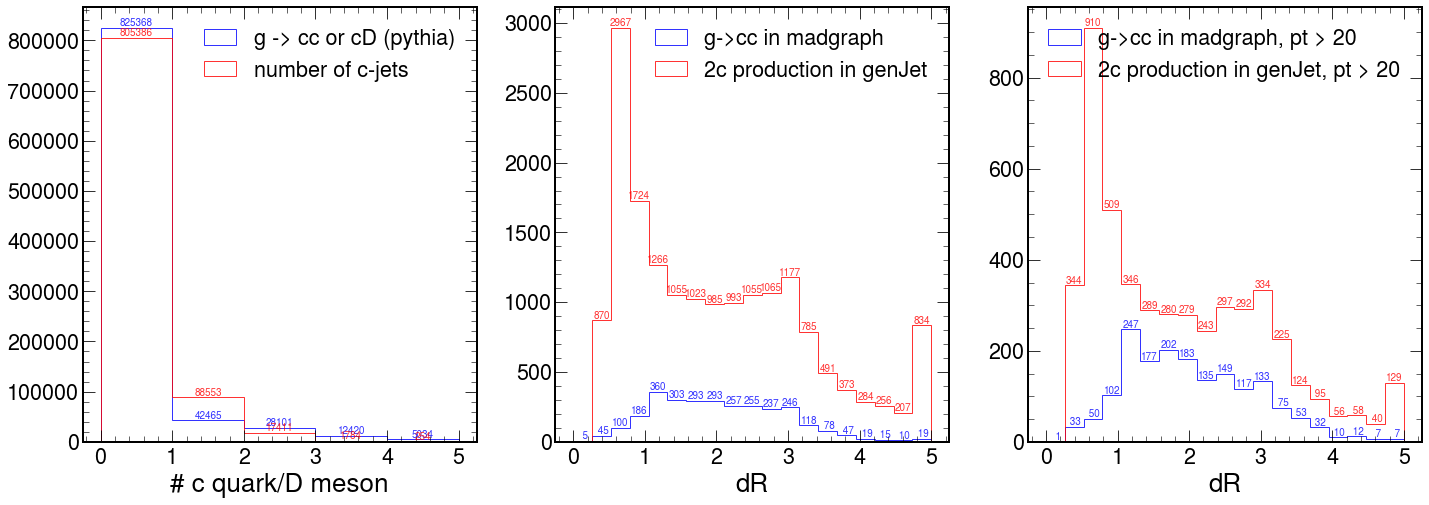

In [134]:
#h_ncjet
#h_n_c_or_D_fromGluon
fig,ax = plt.subplots(1,3,figsize=(24,8))

h_n_c_or_D_fromGluon.plot(ax=ax[0],alpha=0.8,color="blue",histtype='step',show_counts=True)
h_ncjet.plot(ax=ax[0],alpha=0.8,color="red",histtype='step',show_counts=True)

h_dRs_mad_pt0.plot(ax=ax[1],alpha=0.8,color="blue",histtype='step',show_counts=True)
h_dRs_cjet_pt0.plot(ax=ax[1],alpha=0.8,color="red",histtype='step',show_counts=True)

h_dRs_mad_pt20.plot(ax=ax[2],alpha=0.8,color="blue",histtype='step',show_counts=True)
h_dRs_cjet_pt20.plot(ax=ax[2],alpha=0.8,color="red",histtype='step',show_counts=True)

ax[0].set_xlabel("# c quark/D meson")
ax[1].set_xlabel("dR")
ax[2].set_xlabel("dR")
#plt.savefig("/home/users/hmei/public_html/scratch/ngenFromGluon.png")
#plt.savefig("/home/users/hmei/public_html/scratch/ngenFromGluon.pdf")

plt.savefig("/home/users/hmei/public_html/scratch/nc_and_dr.png",bbox_inches='tight')
plt.savefig("/home/users/hmei/public_html/scratch/nc_and_dr.pdf",bbox_inches='tight')